In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation

In [3]:
data = pd.read_csv('C:/Users/Kiran Shankar Bhat/Documents/DATA/data/BankNote_Authentication.csv')

In [4]:
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
data.size

6860

In [6]:
data.shape

(1372, 5)

In [7]:
x = data.drop('class',axis=1)
y = data['class']

## Scaling the data

In [8]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_x = scale.fit_transform(x)

In [9]:
scaled_x

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [10]:
train_data = pd.DataFrame(scaled_x , columns=x.columns)

In [11]:
train_data

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587
...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996
1368,-0.641313,-1.158984,1.179023,0.730127
1369,-1.472357,-2.621646,3.759017,-0.754884
1370,-1.406693,-1.756471,2.552043,-0.043158


## Sampling the data

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)

In [13]:
x_train.shape, y_train.shape

((1097, 4), (1097,))

In [14]:
x_test.shape, y_test.shape

((275, 4), (275,))

## Creating the model

In [15]:
relu_model=Sequential()

In [17]:
relu_model.add(Dense(8, activation = 'relu', input_shape=(x_train.shape[1],)))
relu_model.add(Dense(10,activation= 'relu'))
relu_model.add(Dense(1,activation='sigmoid'))

In [18]:
from tensorflow.keras.optimizers import Adam , SGD , RMSprop

In [19]:
adam = Adam(0.001)

### Compling the model

In [21]:
relu_model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [23]:
predict = relu_model.fit(x_train, y_train,
               validation_split=0.2,
               batch_size=10,
               epochs=50,
               verbose=1)

Epoch 1/50
88/88 [==============================] - 0s 5ms/step - loss: 0.5862 - accuracy: 0.6716 - val_loss: 0.4552 - val_accuracy: 0.8364
Epoch 2/50
88/88 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.9065 - val_loss: 0.2794 - val_accuracy: 0.9591
Epoch 3/50
88/88 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.9532 - val_loss: 0.1578 - val_accuracy: 0.9773
Epoch 4/50
88/88 [==============================] - 0s 2ms/step - loss: 0.1315 - accuracy: 0.9772 - val_loss: 0.0993 - val_accuracy: 0.9864
Epoch 5/50
88/88 [==============================] - 0s 2ms/step - loss: 0.0851 - accuracy: 0.9875 - val_loss: 0.0673 - val_accuracy: 0.9864
Epoch 6/50
88/88 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9909 - val_loss: 0.0454 - val_accuracy: 0.9909
Epoch 7/50
88/88 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9989 - val_loss: 0.0336 - val_accuracy: 1.0000
Epoch 8/50
88/88 [==

+ Here for the "relu" Activation function we got
+ Trining loss as: 0.00045
+ Testing  loss as: 0.00029
+ We can say that the model is quite underfiting.
+ Which are not too close and this model may not work well for noisy and large data set.

In [24]:
relu_model.layers[1].get_weights()

[array([[ 0.27452937,  0.15015186,  0.42846608, -0.25975686,  0.5370475 ,
          0.19427927,  0.9403409 ,  0.20973358,  0.06888471, -0.26273268],
        [ 0.47251624, -0.34081507, -0.0793559 ,  0.29571098,  0.09074057,
         -0.09786923, -0.06938271,  0.6690126 , -0.0823969 ,  0.4239281 ],
        [ 0.89389807,  0.91833514, -0.1548142 ,  1.0502833 , -0.4202236 ,
         -0.10043642, -0.12883961, -0.60643965, -0.4511721 ,  0.5584125 ],
        [-0.22383703,  0.27987286,  0.00377816,  0.22476538,  0.00662109,
          0.25786328, -0.01836834, -0.13360068, -0.4181032 ,  0.62398577],
        [ 0.34900352,  0.3805087 , -1.074349  ,  0.7879395 , -0.97438276,
          0.8050783 , -0.49340945, -0.73291445,  0.35850286,  0.42289194],
        [-0.022984  , -0.11002689,  1.0033605 , -0.31985977,  1.1266446 ,
         -0.14402089,  0.68403935,  0.82269895,  0.32750544, -0.36830932],
        [-0.28810918,  0.02331265,  0.5923757 , -0.23776795,  0.44631302,
         -0.17779426,  0.6554166

In [25]:
relu_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [26]:
y_predict = relu_model.predict(x_test)

In [27]:
y_predict

array([[1.6316321e-10],
       [2.4487972e-03],
       [1.8370854e-05],
       [3.0102727e-17],
       [1.5752456e-10],
       [4.1763670e-07],
       [3.6945409e-11],
       [3.3077092e-09],
       [1.2496058e-07],
       [2.2356568e-11],
       [9.9987173e-01],
       [9.9998885e-01],
       [1.1213268e-09],
       [9.9991453e-01],
       [3.0053183e-08],
       [9.9998045e-01],
       [9.9994230e-01],
       [9.9995369e-01],
       [9.9999976e-01],
       [9.9961448e-01],
       [3.4343306e-11],
       [7.4024475e-10],
       [9.9994504e-01],
       [1.7877085e-11],
       [1.0000000e+00],
       [5.8617633e-10],
       [7.0033280e-13],
       [9.9998546e-01],
       [4.3431724e-15],
       [2.8656260e-13],
       [9.9999958e-01],
       [1.9435453e-09],
       [1.2280287e-07],
       [1.0000000e+00],
       [1.0000000e+00],
       [4.8334440e-12],
       [9.9977487e-01],
       [9.9730808e-01],
       [9.9997896e-01],
       [3.5963427e-10],
       [4.4360036e-11],
       [9.999996

In [28]:
y_pre = []
for i in y_predict:
    if i <0.5:
        y_pre.append(0)
    else:
        y_pre.append(1)

In [29]:
y_pre

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pre)

array([[148,   0],
       [  0, 127]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



Text(0.5, 0, 'epoch')

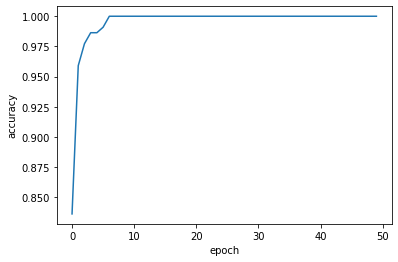

In [32]:
plt.plot(predict.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

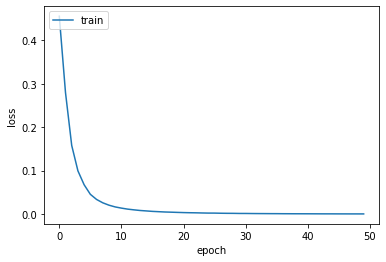

In [33]:
plt.plot(predict.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.savefig('loss vs epoch')

In [34]:
from tensorflow.keras.layers import Activation

In [35]:
leaky_model=Sequential()

In [36]:
leaky_model.add(Dense(8, activation=tf.keras.layers.LeakyReLU(), input_shape=(x_train.shape[1],)))
leaky_model.add(Dense(10,activation= tf.keras.layers.LeakyReLU()))
leaky_model.add(Dense(1,activation='sigmoid'))

In [37]:
leaky_model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [38]:
predict = leaky_model.fit(x_train, y_train,
               validation_split=0.2,
               batch_size=10,
               epochs=50,
               verbose=1)

Epoch 1/50
88/88 [==============================] - 0s 4ms/step - loss: 0.6418 - accuracy: 0.6568 - val_loss: 0.4386 - val_accuracy: 0.8591
Epoch 2/50
88/88 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.9430 - val_loss: 0.2052 - val_accuracy: 0.9864
Epoch 3/50
88/88 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9909 - val_loss: 0.1164 - val_accuracy: 0.9818
Epoch 4/50
88/88 [==============================] - 0s 2ms/step - loss: 0.0986 - accuracy: 0.9909 - val_loss: 0.0775 - val_accuracy: 0.9864
Epoch 5/50
88/88 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0.9909 - val_loss: 0.0560 - val_accuracy: 0.9864
Epoch 6/50
88/88 [==============================] - 0s 2ms/step - loss: 0.0504 - accuracy: 0.9909 - val_loss: 0.0429 - val_accuracy: 0.9864
Epoch 7/50
88/88 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9909 - val_loss: 0.0343 - val_accuracy: 0.9864
Epoch 8/50
88/88 [==

+ Here for the lealyRelu activation function we got
+ training loss as: 0.0016  
+ testing loss as:0.0014, 
+ which is quite higher than the Relu activation function.

In [39]:
softmax_model=Sequential()

In [40]:
softmax_model.add(Dense(8, activation= 'softmax', input_shape=(x_train.shape[1],)))
softmax_model.add(Dense(10,activation= 'softmax'))
softmax_model.add(Dense(1,activation='sigmoid'))

In [41]:
softmax_model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [42]:
predict = softmax_model.fit(x_train, y_train,
               validation_split=0.2,
               batch_size=10,
               epochs=50,
               verbose=1)

Epoch 1/50
88/88 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.5656 - val_loss: 0.6827 - val_accuracy: 0.5364
Epoch 2/50
88/88 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.5656 - val_loss: 0.6698 - val_accuracy: 0.5364
Epoch 3/50
88/88 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.5656 - val_loss: 0.6484 - val_accuracy: 0.5364
Epoch 4/50
88/88 [==============================] - 0s 2ms/step - loss: 0.6250 - accuracy: 0.5964 - val_loss: 0.6096 - val_accuracy: 0.7409
Epoch 5/50
88/88 [==============================] - 0s 2ms/step - loss: 0.5815 - accuracy: 0.8848 - val_loss: 0.5606 - val_accuracy: 0.9091
Epoch 6/50
88/88 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.9487 - val_loss: 0.5020 - val_accuracy: 0.9591
Epoch 7/50
88/88 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.9669 - val_loss: 0.4418 - val_accuracy: 0.9636
Epoch 8/50
88/88 [==

+ Here for the "softmax" activation function we got the 
+ traing loss as: 0.00033
+ testing loss as: 0.00032, 
+ which are quite close and the quite less than that of both Relu and LeakyRelu activation functions.

In [43]:
tan_model=Sequential()

In [44]:
tan_model.add(Dense(8, activation='tanh', input_shape=(x_train.shape[1],)))
tan_model.add(Dense(10,activation= 'tanh'))
tan_model.add(Dense(1,activation='sigmoid'))

In [45]:
tan_model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [46]:
predict = tan_model.fit(x_train, y_train,
               validation_split=0.2,
               batch_size=10,
               epochs=50,
               verbose=1)

Epoch 1/50
88/88 [==============================] - 0s 4ms/step - loss: 0.4922 - accuracy: 0.8016 - val_loss: 0.3481 - val_accuracy: 0.9091
Epoch 2/50
88/88 [==============================] - 0s 2ms/step - loss: 0.2642 - accuracy: 0.9373 - val_loss: 0.1850 - val_accuracy: 0.9818
Epoch 3/50
88/88 [==============================] - 0s 2ms/step - loss: 0.1511 - accuracy: 0.9829 - val_loss: 0.1055 - val_accuracy: 0.9864
Epoch 4/50
88/88 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 0.9897 - val_loss: 0.0669 - val_accuracy: 1.0000
Epoch 5/50
88/88 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9943 - val_loss: 0.0467 - val_accuracy: 1.0000
Epoch 6/50
88/88 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9977 - val_loss: 0.0349 - val_accuracy: 1.0000
Epoch 7/50
88/88 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9977 - val_loss: 0.0274 - val_accuracy: 1.0000
Epoch 8/50
88/88 [==

+ Here for the "Tanh" AF we got the 
+ training loss as:0.00035  
+ testig loss as:0.00035, 
+ Which are quite close and quite less than Relu and LeakyRelu but quite higher than Softmax. 